# MLP vs CNN

## Introduction

In this notebook, I will make a short comparison between the use of a standard MLP (multi-layer perceptron, or feed forward network, or vanilla neural network, whatever name suits your fancy) and a CNN (convolutional neural network) for image recognition using supervised learning. It'll be clear that, although an MLP could be used, CNN's are much more suited for this task, since they keep the dimensional information of a picture into account, something MLP's do not do.

When thinking about providing this notebook as an example, I went back and fort a few times, and ultimately decided to not make it *somewhat* beginner-friendly. Thus, I will provide explanations of some basic concepts like perceptrons, layers, logistic regression, activation or cost functions, gradient descent, overfitting and possible counter-measures against it, and so on. Don't expect a full in-depth tutorial about the full theory behind it all though. There are nowadays so many courses to be found, like Udacity School of AI(which I highly recommend!), or Coursera Machine Learning, where you can learn all about the basic concepts and even implement some examples. Now, I don't have too much in-depth experience with online AI courses other than from those 2 sources, but what I did notice when looking at other courses is that a lot of them do explain the core concepts and theory behind it all, but fail to convert that into actual applicable skills (the Udacity ones being an exception to that, again, invest in them, it's well worth it).

So what I decided to go for is to limit the theory and focus on application with this notebook. I will explain some concepts from time to time, but you'd do best to build up some basic theoretical knowledge about core concepts. Together with the explanation I will give here, that should be enough to understand everything that is going on. Also, no fear, this is by no means complicated stuff, but just a simple example, comparing MLP's with CNN's for image classification.

## The tools

In order to build the neural networks and do the training, I will use Keras, with TensorFlow as the backend. I will go for TensorFlow-GPU to be more specific (to shorten the training time). Of course you can use the standard version of TensorFlow that will run on the CPU, but that will definitely take a bit more time. Alternatively, run this notebook in the cloud. AWS is a good start, they have several GPU machine learning options to choose from. Other Python libraries I used are NumPy and Matplotlib, which are basically the usual suspects when doing this line of work.

## The dataset

As you know, having a clean, complete data set is very important, so in order to avoid all the clean up and preprocessing steps, and focus on the actual neural network, we'll just use a prepared example. I'll use the CIFAR10 dataset,  which is included in the installation of Keras. This dataset consists of 50.000 (that's 50,000 for you using a comma as a decimal separator) 32x32 pixel color training images, labeled over 10 categories, and 10k (see how I avoided the formatting problem there?) test images.

## MLP

So let's start with a basic explanation of what an MLP actually is. In fact, the description "multi-layer perceptron" pretty much says it all (and says nothing at the same time). I trust the "multi-layer" part will sort itself out from the moment you know what a perceptron is. A perceptron is quite simply the most basic neural network you can think of. You probably already know, like a biological neuron having dendrites, a cell body and an axon, the equivalents of that for an artificial neuron are the input channels, a processing stage, and an output, as displayed here:

![Perceptron](images/singleperceptron.png)

What happens here, is really rather simple (and I'm going to speed through this, so sit tight): image a simple function with a number of inputs x<sub>1</sub>, x<sub>2</sub>, ... all the way to x<sub>n</sub>. When the inputs come in, each gets multiplied by the weight value that is assigned to this particular input: so x<sub>1</sub> gets multiplied by w<sub>1</sub>, x<sub>2</sub> by w<sub>2</sub> and so on. All the resulting values are then summed up to a single value. We also have what's called a bias (nothing crazy, it's like the constant in linear regression), which is also added to the sum. Finally, the result of these calculations have to be turned into an output signal. This is done by feeding the result to an activation function.

The activation function in the last step, designated with the funny Greek symbol (just say sigmoid), is the function that will transform the result of the processing of our inputs to a signal for the outside world. That statement in and of itself doesn't help much, I realize that. But think about what an axon in a biological neuron does. It "fires" a response or output, or it does not. The same must happen for our artificial neuron. The result of the calculation inside the neuron could be anything ranging from -inf to +inf. After all, we receive several inputs, which we then have to combine with the weights we chose. Inside of the neuron, it doesn't really matter what the result looks like, but we obviously care, since we are actually trying to make the perceptron do something. The most basic use case is simple classification into 2 categories. So for example: if the result of the transfer function is above a certain value, classify in one category. Otherwise, designate the other category.

Now, in reality, we are outputting probabilities. We want to check the probability that the result of our function makes a certain set of input variables end up in one or the other category. So we use a sigmoid function for that (in this case, the logistic function as displayed below this paragraph), which takes any value and transforms it to a value between 0 and 1, which is basically our probability. There are many other activation functions (softmax for multiple classification, reactive linear unit or relu, hyperbolic tangent, ...), each with their own uses and properties. I'm not going to go deep into those, there are several sources out there to learn more about them.

![Sigmoid](images/logisticsigmoid.jpg)

So, in very simple terms, that is what a perceptron is and does. So what can you do with it? Well, you could use it to do 2-class classification. For example, to predict whether a student passes a course based on the points he and she scored on several tests. Or you could emulate AND, OR, or NOT functions. They basically do the same thing, right? Based on a number of inputs (TRUE, FALSE, FALSE, TRUE, TRUE) you determine whether the end result of an logical operator outputs TRUE or FALSE. So you could take a dataset of the results of applying, for example, the AND function to 4 input variables (each having the value TRUE or FALSE), and predict for any combination of 4 values whether the output is TRUE or FALSE. Or translated to neural network terms: given 4 input variables, what is the probability of the output being TRUE.

Now, at the start, all neurons have random weights and a random bias. In an iterative process called feedforward and backpropagation, the weights and biases are gradually shifted so that the next result is a bit closer to the desired output. In this fashion, the neural network gradually moves towards a state where the desired patterns are “learned”. That is, in one of the most extreme nutshells, what the process is all about.

So what about the "multi-layer" part? Well, it's clear that a simple perceptron hase a limited set of use cases. The world starts to look extremely interesting however, if we could start combining them. In very simple terms we can do that by
* sending the inputs not to 1 perceptron, but to several
* treating the output of each of the perceptrons as inputs for another perceptron, or even multiple layers of perceptrons

So whereas 1 perceptron can classify an input in 2 categories, achieving (if displayed on a graph) something like this:

![2 class classification](images/2classification.png)

a more elaborate amalgam (I love that word) or perceptrons, orchestrated in several layers (I love English in general) as such:

![mlp](images/mlp.png)

where we see all inputs (in the first column) be **fully connected** to each neuron in the second layer (or column), which is in turn connected to each neuron in the third layer, whose inputs then go to the output layer, which then outputs a probability, could look something like this:

![hyperplane](images/hyperplane.png)

Now please realize this is all explained in very simple basic terms, in order not to complicate matters in this rather basic tutorial. In reality, this kind of MLP will quickly turn into an almost obscure brew of linear functions, activation functions, backpropagation, hyperparameter optimalization, matrix multiplications and a mix of funny terms and techniques. But in reality, it all boils down to as simple an explanation as above. Just with much more grimy details (that matter a lot).

In [2]:
import numpy as np
from collections import namedtuple as nt
import matplotlib.pyplot as plt
%matplotlib inline
Data = nt("Data", "x_train y_train x_valid y_valid x_test y_test")

In [3]:
def visualize_data(data):
    images_to_show = 36
    per_row = 12
    fig = plt.figure(figsize=(20,5))
    for i in range(images_to_show):
        pos = (i // per_row, ((i % per_row) + per_row) % per_row)
        ax = plt.subplot2grid((int(images_to_show / per_row), per_row), pos, xticks=[], yticks=[])
        ax.imshow(np.squeeze(data.x_train[i]))
    plt.show()

In [27]:
# A chart showing how the accuracy for the training and tests sets evolved
def visualize_training(hist):
    plt.plot(hist.history['acc'])
    plt.plot(hist.history['val_acc'])
    plt.title('accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epochs')
    plt.legend(['training', 'validation'], loc='lower right')
    plt.show()
    
    # A chart showing our training vs validation loss
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.legend(['training', 'validation'], loc='upper right')
    plt.show()

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout, Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras.datasets import cifar10

Using TensorFlow backend.


In [6]:
def preprocess(data, categories):
    x_train = data.x_train.astype("float32") / 255
    x_test = data.x_test.astype("float32") / 255
    y_train = to_categorical(data.y_train, categories)
    y_test = to_categorical(data.y_test, categories)    
    return Data(x_train[5000:], y_train[5000:],
                x_train[:5000], y_train[:5000],
                x_test, y_test)

In [7]:
def build_mlp(data, categories):
    # Create model architecture
    model = Sequential()
    model.add(Flatten(input_shape=data.x_train.shape[1:]))
    model.add(Dense(1000, activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(512, activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(categories, activation="softmax"))
    
    # Compile the model
    model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])
    return model

In [8]:
# Load data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
data = Data(x_train, y_train, None, None, x_test, y_test)

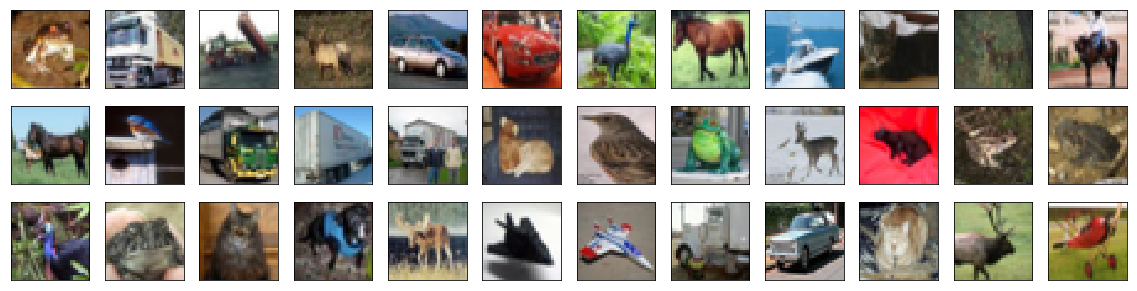

In [9]:
# Visualize the data
visualize_data(data)

In [10]:
# Preprocess the data
categories = len(np.unique(data.y_train))
print("Shape of x_train pre-processing: ", data.x_train.shape)
print("Shape of y_train pre-processing: ", data.y_train.shape)
processed_data = preprocess(data, categories)
print("Shape of x_train post-processing: ", processed_data.x_train.shape)
print("Shape of y_train post-processing: ", processed_data.y_train.shape)
print("Shape of x_valid post-processing: ", processed_data.x_valid.shape)
print("Shape of y_valid post-processing: ", processed_data.y_valid.shape)
print("Shape of x_test post-processing: ", processed_data.x_test.shape)
print("Shape of y_test post-processing: ", processed_data.y_test.shape)

Shape of x_train pre-processing:  (50000, 32, 32, 3)
Shape of y_train pre-processing:  (50000, 1)
Shape of x_train post-processing:  (45000, 32, 32, 3)
Shape of y_train post-processing:  (45000, 10)
Shape of x_valid post-processing:  (5000, 32, 32, 3)
Shape of y_valid post-processing:  (5000, 10)
Shape of x_test post-processing:  (10000, 32, 32, 3)
Shape of y_test post-processing:  (10000, 10)


In [19]:
# Build mlp
mlp = build_mlp(processed_data, categories)
print("MLP architecture:")
mlp.summary()

MLP architecture:
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1000)              3073000   
_________________________________________________________________
dropout_3 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               512512    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 3,590,642
Trainable params: 3,590,642
Non-trainable params: 0
________________________________________________

In [17]:
mlp_weights_path = "saved_weights/cifar10_mlp_best.hdf5"

In [23]:
# Train the mlp
checkpointer_mlp = ModelCheckpoint(filepath=mlp_weights_path, verbose=1, save_best_only=True)
hist_mlp = mlp.fit(processed_data.x_train, processed_data.y_train, batch_size=32, 
                   epochs=100, validation_data=(processed_data.x_valid, processed_data.y_valid),
                   callbacks=[checkpointer_mlp], shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/100
45000/45000 [==============================] - 15s 332us/step - loss: 1.7700 - acc: 0.3732 - val_loss: 1.7557 - val_acc: 0.3632

Epoch 00001: val_loss improved from inf to 1.75572, saving model to saved_weights/cifar10_mlp_best.hdf5
Epoch 2/100
45000/45000 [==============================] - 14s 321us/step - loss: 1.7658 - acc: 0.3761 - val_loss: 1.6900 - val_acc: 0.3952

Epoch 00002: val_loss improved from 1.75572 to 1.69003, saving model to saved_weights/cifar10_mlp_best.hdf5
Epoch 3/100
45000/45000 [==============================] - 14s 321us/step - loss: 1.7655 - acc: 0.3772 - val_loss: 1.9421 - val_acc: 0.3354

Epoch 00003: val_loss did not improve from 1.69003
Epoch 4/100
45000/45000 [==============================] - 15s 324us/step - loss: 1.7621 - acc: 0.3775 - val_loss: 1.7057 - val_acc: 0.3758

Epoch 00004: val_loss did not improve from 1.69003
Epoch 5/100
45000/45000 [==============================] - 15s 326us/step


Epoch 00042: val_loss did not improve from 1.69003
Epoch 43/100
45000/45000 [==============================] - 14s 322us/step - loss: 1.8502 - acc: 0.3615 - val_loss: 1.8525 - val_acc: 0.3416

Epoch 00043: val_loss did not improve from 1.69003
Epoch 44/100
45000/45000 [==============================] - 15s 323us/step - loss: 1.8456 - acc: 0.3601 - val_loss: 1.8624 - val_acc: 0.3488

Epoch 00044: val_loss did not improve from 1.69003
Epoch 45/100
45000/45000 [==============================] - 15s 322us/step - loss: 1.8427 - acc: 0.3599 - val_loss: 1.8718 - val_acc: 0.3576

Epoch 00045: val_loss did not improve from 1.69003
Epoch 46/100
45000/45000 [==============================] - 14s 322us/step - loss: 1.8552 - acc: 0.3539 - val_loss: 1.9445 - val_acc: 0.3350

Epoch 00046: val_loss did not improve from 1.69003
Epoch 47/100
45000/45000 [==============================] - 15s 324us/step - loss: 1.8532 - acc: 0.3586 - val_loss: 1.9958 - val_acc: 0.3362

Epoch 00047: val_loss did not impr

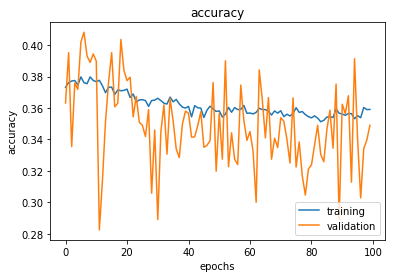

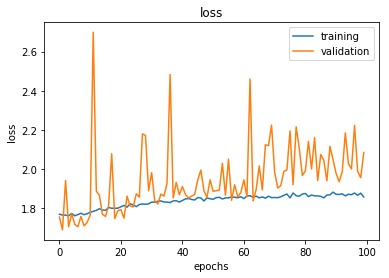

In [28]:
visualize_training(hist_mlp)

In [20]:
mlp.load_weights(mlp_weights_path)
score_mlp = mlp.evaluate(processed_data.x_test, processed_data.y_test, verbose=0)

## Convolutional Neural Networks

In [11]:
from keras.layers import Conv2D, MaxPooling2D

In [12]:
def build_cnn(data, categories):
    # Create model architecture
    model = Sequential()
    model.add(Conv2D(filters=16, kernel_size=2, padding="same", activation="relu", input_shape=data.x_train.shape[1:]))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Conv2D(filters=32, kernel_size=2, padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Conv2D(filters=64, kernel_size=2, padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.3))
    model.add(Flatten())
    model.add(Dense(500, activation="relu"))
    model.add(Dropout(0.4))
    model.add(Dense(categories, activation="softmax"))
    
    # Compile the model
    model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])
    return model

In [13]:
# Build cnn
cnn = build_cnn(processed_data, categories)
print("CNN architecture:")
cnn.summary()

CNN architecture:
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 64)          0  

In [ ]:
cnn_weights_path = "saved_weights/cifar10_cnn_best.hdf5"

In [30]:
# Train the cnn
checkpointer_cnn = ModelCheckpoint(cnn_weights_path, verbose=1, save_best_only=True)
hist_cnn = cnn.fit(processed_data.x_train, processed_data.y_train, batch_size=32, 
                   epochs=20, validation_data=(processed_data.x_valid, processed_data.y_valid),
                   callbacks=[checkpointer_cnn])

Train on 45000 samples, validate on 5000 samples
Epoch 1/20
45000/45000 [==============================] - 13s 286us/step - loss: 1.0418 - acc: 0.6503 - val_loss: 0.9909 - val_acc: 0.6718

Epoch 00001: val_loss improved from inf to 0.99090, saving model to saved_weights/cifar10_cnn_best.hdf5
Epoch 2/20
45000/45000 [==============================] - 13s 281us/step - loss: 1.0583 - acc: 0.6434 - val_loss: 0.9868 - val_acc: 0.6794

Epoch 00002: val_loss improved from 0.99090 to 0.98677, saving model to saved_weights/cifar10_cnn_best.hdf5
Epoch 3/20
45000/45000 [==============================] - 13s 294us/step - loss: 1.0701 - acc: 0.6438 - val_loss: 1.1324 - val_acc: 0.6510

Epoch 00003: val_loss did not improve from 0.98677
Epoch 4/20
45000/45000 [==============================] - 13s 282us/step - loss: 1.0878 - acc: 0.6408 - val_loss: 1.0465 - val_acc: 0.6654

Epoch 00004: val_loss did not improve from 0.98677
Epoch 5/20
45000/45000 [==============================] - 13s 285us/step - lo

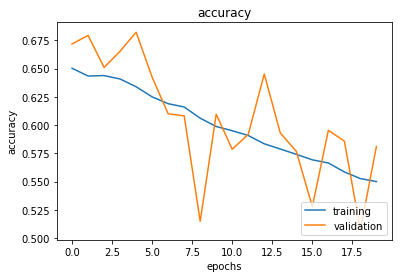

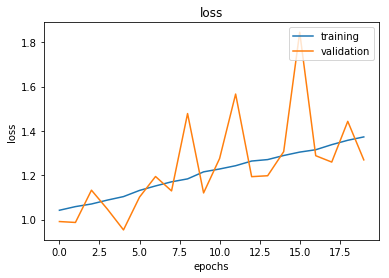

In [31]:
visualize_training(hist_cnn)

In [32]:
cnn.load_weights(cnn_weights_path)
score_cnn = cnn.evaluate(processed_data.x_test, processed_data.y_test, verbose=0)

In [33]:
# Compare the scores
print("Accuracy mlp: {0:.2f}%".format(score_mlp[1] * 100))
print("Accuracy cnn: {0:.2f}%".format(score_cnn[1] * 100))

Accuracy mlp: 40.11%
Accuracy cnn: 67.18%
